# Simple Classifier for the Iris Dataset

This notebook provides a step-by-step guide to building and evaluating a simple classifier for the classic Iris dataset. We will explore two popular models: Logistic Regression and Decision Trees, and demonstrate the effects of hyperparameter tuning.

## Step 1: Setup and Library Imports
First, we import all the necessary Python libraries.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

## Step 2: Load and Prepare the Dataset
We'll load the Iris dataset and select two features to make it easier to visualize the decision boundaries. We then split the data into training and testing sets.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2] # We'll use the first two features: sepal length and sepal width
y = iris.target

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (105, 2)
Testing data shape: (45, 2)


## Step 3: A Helper Function for Visualization
This function will help us visualize the decision boundaries of our classifiers.

In [3]:
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary of a classifier."""
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

## Step 4: Logistic Regression Classifier
Logistic Regression is a simple yet powerful linear model for classification.

--- Logistic Regression Model Evaluation ---
Accuracy: 0.78
F1-Score: 0.73


c:\Users\sjain\logistic regression _ Iris\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


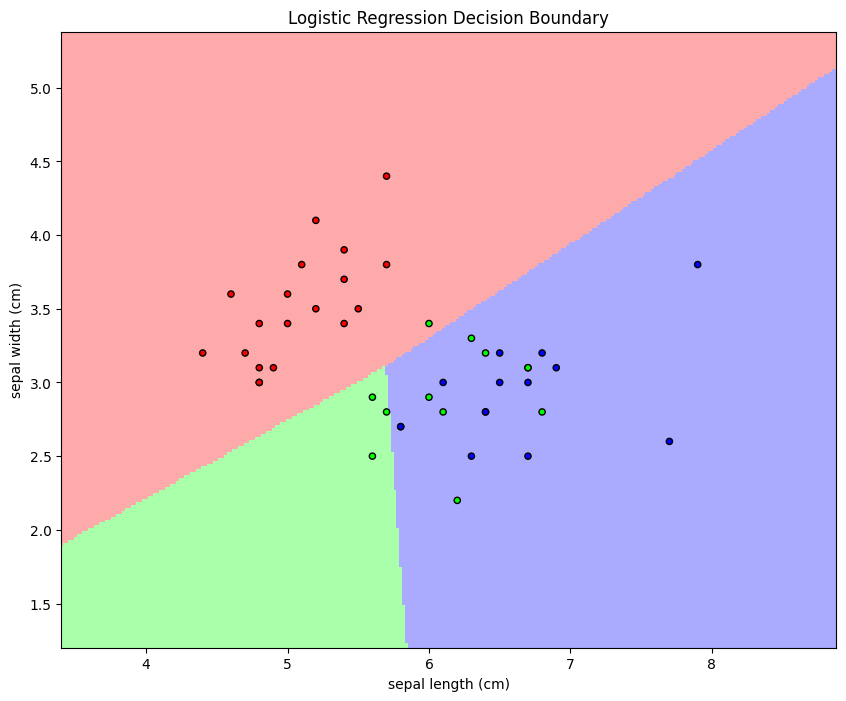

In [4]:
# Train the Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"F1-Score: {f1_log_reg:.2f}")

# Visualize the decision boundary
plot_decision_boundary(log_reg_model, X_test, y_test, 'Logistic Regression Decision Boundary')

## Step 5: Decision Tree Classifier
Decision Trees can capture more complex, non-linear relationships in the data.

--- Simple Decision Tree Model Evaluation ---
Accuracy: 0.67
F1-Score: 0.67


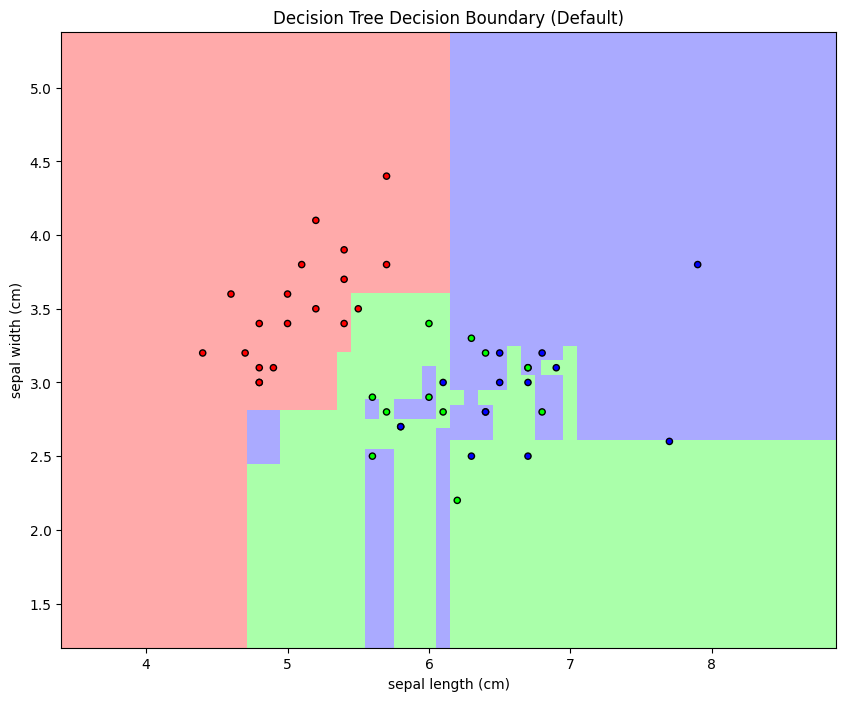

In [5]:
# Train a simple Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("--- Simple Decision Tree Model Evaluation ---")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"F1-Score: {f1_tree:.2f}")

# Visualize the decision boundary
plot_decision_boundary(tree_model, X_test, y_test, 'Decision Tree Decision Boundary (Default)')

## Step 6: Hyperparameter Tuning and Overfitting
Here, we'll demonstrate overfitting by training a Decision Tree with a very high max_depth. The model will perform perfectly on the training data but might struggle with unseen test data. We then use GridSearchCV to find the optimal max_depth to prevent overfitting.

--- Overfitting Demonstration ---
Overfit Tree Training Accuracy: 0.94
Overfit Tree Testing Accuracy: 0.73


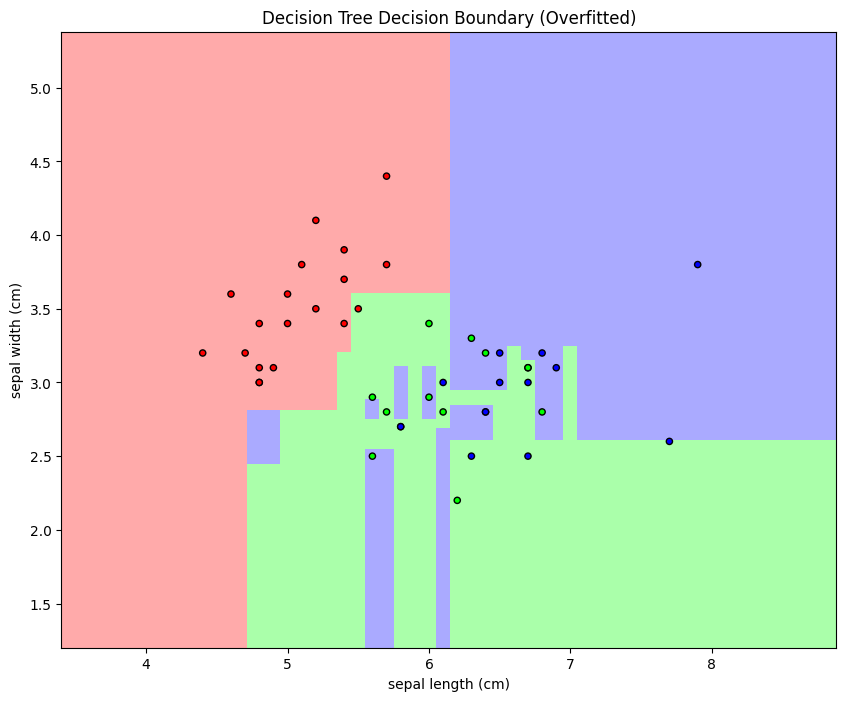


--- Hyperparameter Tuning with GridSearchCV ---
Best max_depth found: 3

Optimized Tree Accuracy: 0.76
Optimized Tree F1-Score: 0.76


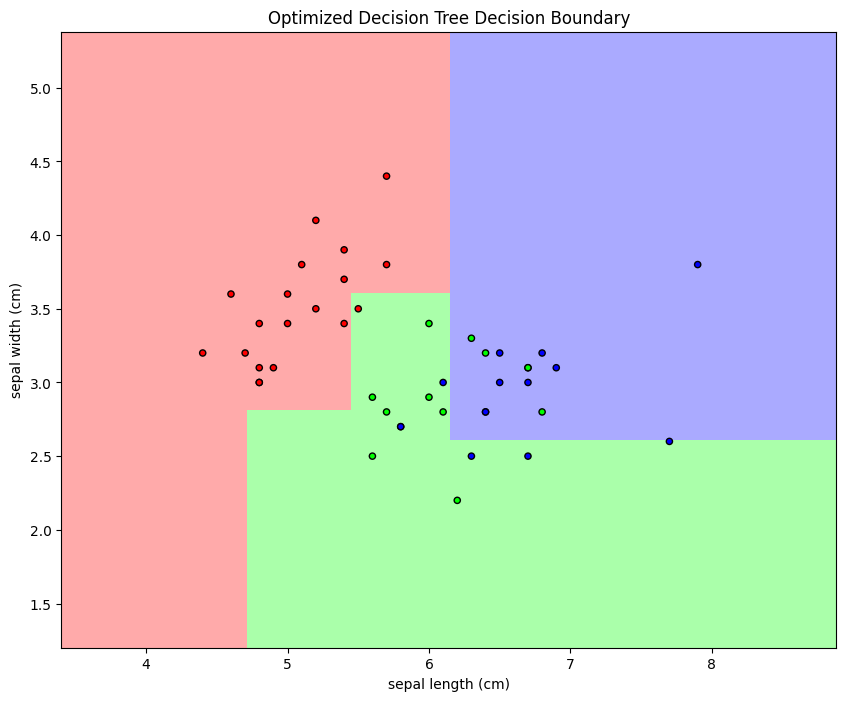

In [6]:
# Demonstrate Overfitting with a deep tree
overfitting_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
overfitting_tree.fit(X_train, y_train)

y_pred_overfit = overfitting_tree.predict(X_train)
y_test_pred_overfit = overfitting_tree.predict(X_test)

print("--- Overfitting Demonstration ---")
print(f"Overfit Tree Training Accuracy: {accuracy_score(y_train, y_pred_overfit):.2f}")
print(f"Overfit Tree Testing Accuracy: {accuracy_score(y_test, y_test_pred_overfit):.2f}")

# Visualize the overfitted decision boundary
plot_decision_boundary(overfitting_tree, X_test, y_test, 'Decision Tree Decision Boundary (Overfitted)')

# Use GridSearchCV to find the best max_depth
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning with GridSearchCV ---")
print(f"Best max_depth found: {grid_search.best_params_['max_depth']}")
best_tree = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_tree = best_tree.predict(X_test)
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
f1_best_tree = f1_score(y_test, y_pred_best_tree, average='weighted')

print(f"\nOptimized Tree Accuracy: {accuracy_best_tree:.2f}")
print(f"Optimized Tree F1-Score: {f1_best_tree:.2f}")

# Visualize the optimized decision boundary
plot_decision_boundary(best_tree, X_test, y_test, 'Optimized Decision Tree Decision Boundary')
